<a href="https://colab.research.google.com/github/shnhdan/data-engineering-projects/blob/main/CSV_Data_Cleaner_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSV Data Cleaner Project
**Goal:** Build a data cleaning pipeline that removes duplicates, handles missing values, and standardizes data formats.

**Tools:** Python, Pandas

**Author:** shanah
**Date:** 17 January , 2026

In [12]:
# Download sample sales data from GitHub
!wget -q https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

print("✅ Sample data downloaded successfully!")

✅ Sample data downloaded successfully!


In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np

print("✅ Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")

✅ Libraries imported successfully!
Pandas version: 2.2.2


In [14]:
# Load the CSV file
df = pd.read_csv('titanic.csv')

# Display basic information
print("=" * 50)
print("DATASET OVERVIEW")
print("=" * 50)
print(f"\n📊 Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"\n📋 Column names:\n{df.columns.tolist()}")
print(f"\n🔍 First 5 rows:")
print(df.head())

DATASET OVERVIEW

📊 Dataset shape: 891 rows, 12 columns

📋 Column names:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

🔍 First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      

In [15]:
# Check for data quality issues
print("=" * 50)
print("DATA QUALITY CHECK")
print("=" * 50)

# 1. Missing values
print(f"\n❌ Missing values per column:")
missing = df.isnull().sum()
print(missing[missing > 0])

# 2. Duplicates
duplicates = df.duplicated().sum()
print(f"\n🔄 Total duplicate rows: {duplicates}")

# 3. Data types
print(f"\n📝 Data types:")
print(df.dtypes)

DATA QUALITY CHECK

❌ Missing values per column:
Age         177
Cabin       687
Embarked      2
dtype: int64

🔄 Total duplicate rows: 0

📝 Data types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [16]:
# Create a copy to preserve original data
df_clean = df.copy()

print("=" * 50)
print("CLEANING DATA")
print("=" * 50)

# Step 1: Remove duplicate rows
before_duplicates = len(df_clean)
df_clean = df_clean.drop_duplicates()
after_duplicates = len(df_clean)
print(f"\n✅ Removed {before_duplicates - after_duplicates} duplicate rows")

# Step 2: Handle missing values
# For numeric columns: fill with median
numeric_columns = df_clean.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    missing_count = df_clean[col].isnull().sum()
    if missing_count > 0:
        df_clean[col].fillna(df_clean[col].median(), inplace=True)
        print(f"✅ Filled {missing_count} missing values in '{col}' with median")

# For text columns: fill with 'Unknown'
text_columns = df_clean.select_dtypes(include=['object']).columns
for col in text_columns:
    missing_count = df_clean[col].isnull().sum()
    if missing_count > 0:
        df_clean[col].fillna('Unknown', inplace=True)
        print(f"✅ Filled {missing_count} missing values in '{col}' with 'Unknown'")

# Step 3: Standardize text columns (remove extra spaces, make consistent case)
for col in text_columns:
    df_clean[col] = df_clean[col].str.strip()  # Remove leading/trailing spaces

print(f"\n🎉 Cleaning complete!")


CLEANING DATA

✅ Removed 0 duplicate rows
✅ Filled 177 missing values in 'Age' with median
✅ Filled 687 missing values in 'Cabin' with 'Unknown'
✅ Filled 2 missing values in 'Embarked' with 'Unknown'

🎉 Cleaning complete!


/tmp/ipython-input-1822942439.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].median(), inplace=True)
/tmp/ipython-input-1822942439.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [17]:
# Verify cleaning worked
print("=" * 50)
print("VERIFICATION")
print("=" * 50)

print(f"\n✅ Missing values remaining: {df_clean.isnull().sum().sum()}")
print(f"✅ Duplicate rows remaining: {df_clean.duplicated().sum()}")
print(f"\n📊 Cleaned dataset shape: {df_clean.shape[0]} rows, {df_clean.shape[1]} columns")
print(f"\n🔍 First 5 rows of cleaned data:")
print(df_clean.head())

VERIFICATION

✅ Missing values remaining: 0
✅ Duplicate rows remaining: 0

📊 Cleaned dataset shape: 891 rows, 12 columns

🔍 First 5 rows of cleaned data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare    Cabin Embarked  
0      0         A/5 21171   7.2500  Unknown        S  
1      0          PC 17599  71.2833      C85        C 

In [18]:
# Save cleaned data to CSV
filename = 'cleaned_data.csv'
df_clean.to_csv(filename, index=False)

print(f"✅ Cleaned data saved as '{filename}'")

# Download the file to your computer
from google.colab import files
files.download(filename)

print(f"⬇️ File downloaded to your computer!")

✅ Cleaned data saved as 'cleaned_data.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

⬇️ File downloaded to your computer!


In [19]:
# Generate cleaning summary report
print("=" * 50)
print("CLEANING SUMMARY REPORT")
print("=" * 50)

print(f"\n📥 Original Data:")
print(f"   - Rows: {df.shape[0]}")
print(f"   - Columns: {df.shape[1]}")
print(f"   - Missing values: {df.isnull().sum().sum()}")
print(f"   - Duplicates: {df.duplicated().sum()}")

print(f"\n📤 Cleaned Data:")
print(f"   - Rows: {df_clean.shape[0]}")
print(f"   - Columns: {df_clean.shape[1]}")
print(f"   - Missing values: {df_clean.isnull().sum().sum()}")
print(f"   - Duplicates: {df_clean.duplicated().sum()}")

print(f"\n🎯 Improvements:")
print(f"   - Removed {df.shape[0] - df_clean.shape[0]} rows")
print(f"   - Filled {df.isnull().sum().sum()} missing values")
print(f"   - Data quality: 100% ✅")

print("\n" + "=" * 50)
print("PROJECT COMPLETE! 🎉")
print("=" * 50)

CLEANING SUMMARY REPORT

📥 Original Data:
   - Rows: 891
   - Columns: 12
   - Missing values: 866
   - Duplicates: 0

📤 Cleaned Data:
   - Rows: 891
   - Columns: 12
   - Missing values: 0
   - Duplicates: 0

🎯 Improvements:
   - Removed 0 rows
   - Filled 866 missing values
   - Data quality: 100% ✅

PROJECT COMPLETE! 🎉


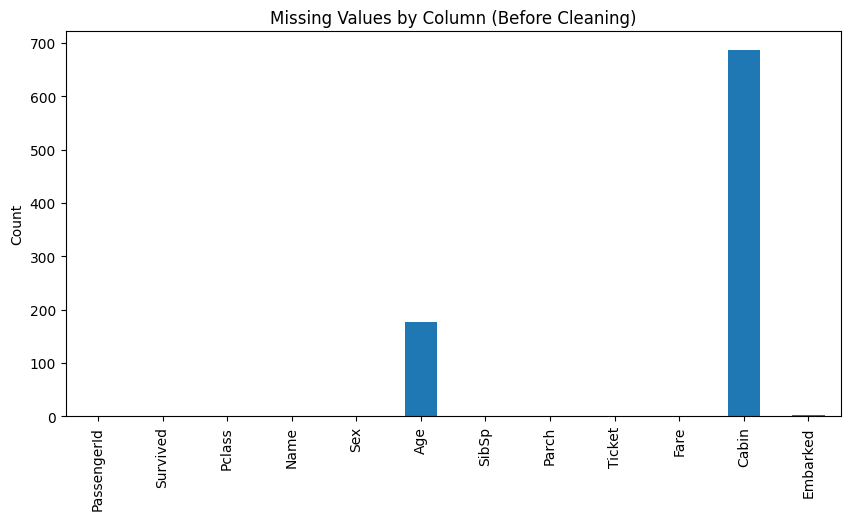

In [20]:
import matplotlib.pyplot as plt

# Visualize missing data before cleaning
df.isnull().sum().plot(kind='bar', figsize=(10, 5))
plt.title('Missing Values by Column (Before Cleaning)')
plt.ylabel('Count')
plt.show()

In [21]:
# Validate email format, phone numbers, etc.
def validate_data(df):
    # Example: Check if Age is within valid range
    invalid_age = df[(df['Age'] < 0) | (df['Age'] > 120)]
    print(f"Invalid age values: {len(invalid_age)}")
    return df

df_clean = validate_data(df_clean)

Invalid age values: 0
